In [1]:
import math
import matplotlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

In [2]:
def find_bins(observations, width):
    minimmum = np.min(observations)
    maximmum = np.max(observations)
    bound_min = -1.0 * (minimmum % width - minimmum)
    bound_max = maximmum - maximmum % width + width
    n = int((bound_max - bound_min) / width) + 1
    bins = np.linspace(bound_min, bound_max, n)
    return bins

Selecionando arbovirose

In [3]:
arbo_v = widgets.Combobox(
    placeholder = 'Selecione uma: ',
    options = ["Dengue", "Chikungunya", "Zika"],
    description = 'Arbovirose: ',
    ensure_option = True
)

display(arbo_v)

Combobox(value='', description='Arbovirose: ', ensure_option=True, options=('Dengue', 'Chikungunya', 'Zika'), …

In [7]:
arbo_v.value = str.lower(arbo_v.value)

map = "./Map/Map.shp"

if arbo_v.value == "dengue":
    anos = 10
else:
    anos = 5
dados = f"../scr/{arbo_v.value}/casos_municipio_{anos}.csv"

bahia = gpd.read_file(map)

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")

In [5]:
ano_plotado = widgets.Combobox(
    placeholder = 'Selecione um: ',
    options = list(df.columns[2:]),
    description = 'Ano para plotar: ',
    ensure_option = True
)

display(ano_plotado)

Combobox(value='', description='Ano para plotar: ', ensure_option=True, options=('2011', '2012', '2013', '2014…

In [8]:
for i in range (1, anos+2):
    bahia[f"{df.columns[1:][i]}"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "Município"] == df.loc[j, "Município"]:
            for k in range(1, anos+2):
                bahia.loc[i, f"{df.columns[1:][k]}"] = df.loc[j, f"{df.columns[1:][k]}"]


In [9]:
df = pd.read_csv("../scr/BA - IBGE 2010.csv")

In [10]:
bahia["População 2010"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "Município"] == df.loc[j, "Município"]:
            bahia.loc[i, "População 2010"] = df.loc[j, "População 2010"]

In [12]:
nc = math.ceil( 1 + 3.322 * math.log(len(bahia), 10) )
intervalo = []
for i in range (nc):
    intervalo.append(bahia[f"{ano_plotado.value}"].quantile(nc * i/100))
intervalo = sorted(set(intervalo))

In [13]:
plt.rcParams["figure.figsize"] = (10, 10)

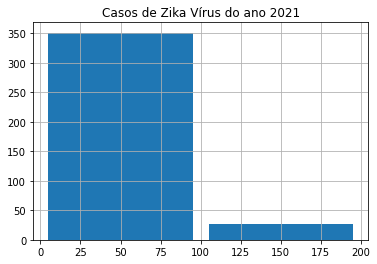

In [14]:
binwidth=50

bahia.hist(column=f"{ano_plotado.value}", bins = find_bins(intervalo, 100), rwidth=0.9)

if arbo_v == "dengue":
    plt.title(f"Casos de Dengue do ano {ano_plotado.value}")
elif arbo_v == "chikungunya":
    plt.title(f"Casos de Chikungunya do ano {ano_plotado.value}")
else:
    plt.title(f"Casos de Zika Vírus do ano {ano_plotado.value}")

Plotagem automatica

In [15]:
plt.rcParams["figure.figsize"] = (20, 20)

<AxesSubplot:>

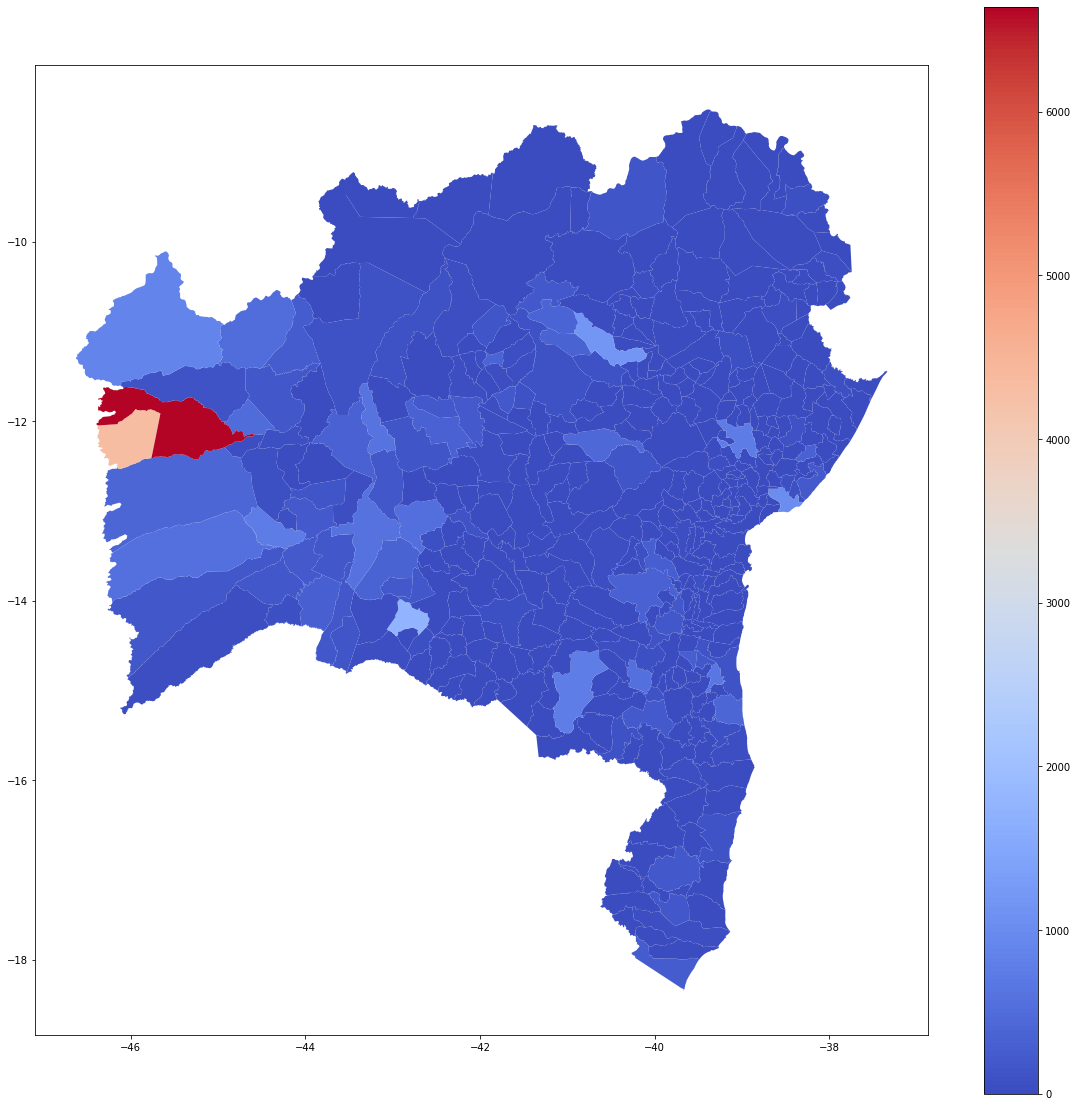

In [16]:
bahia.plot(column=f"{ano_plotado.value}", cmap='coolwarm', linewidth=1, legend=True)

<AxesSubplot:>

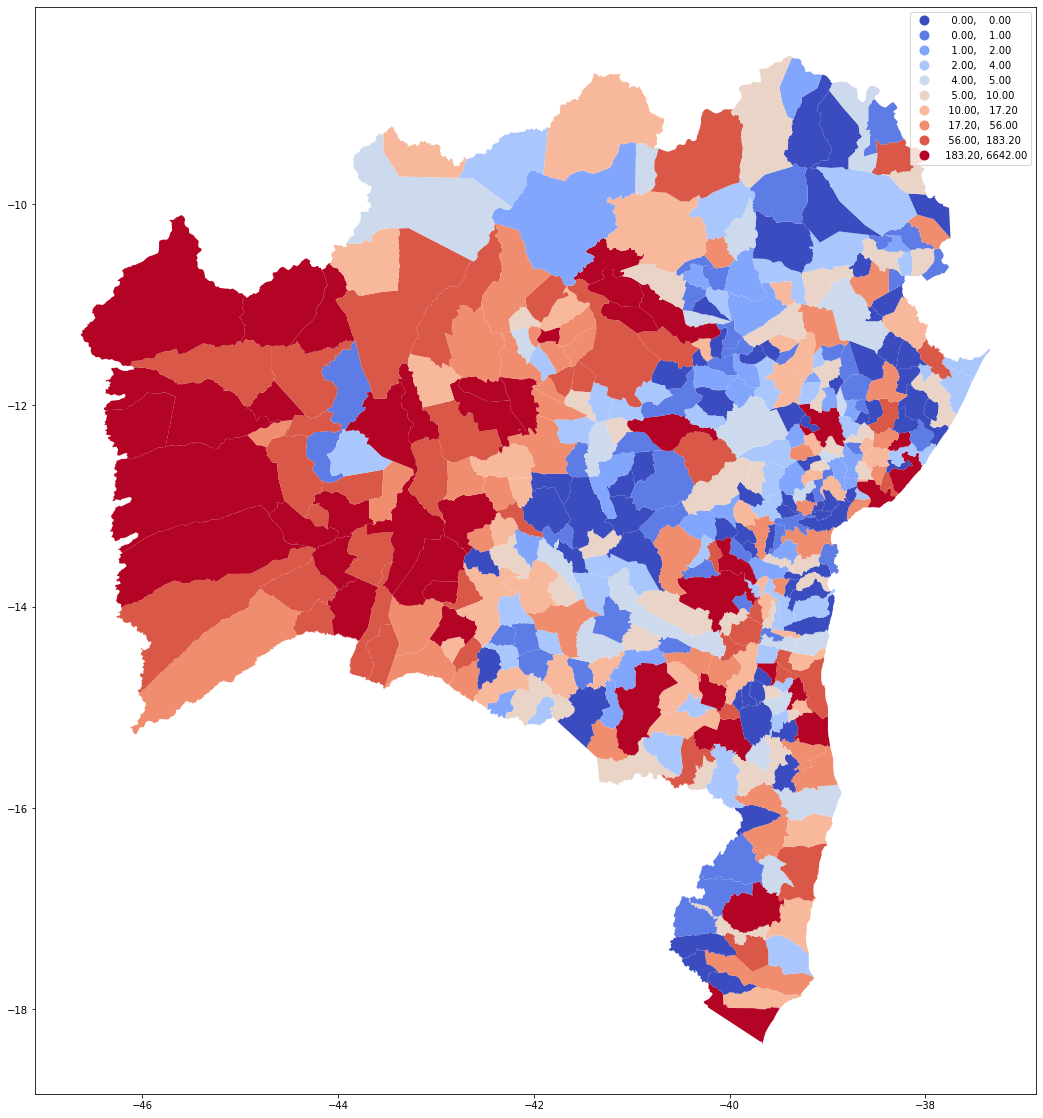

In [17]:
bahia.plot(column=f"{ano_plotado.value}", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True)

In [23]:
bahia["Casos_100.000hab"] = round(bahia.loc[:, f'{ano_plotado.value}']/bahia.iloc[:, 14] * 100000, 0)

intervalo = []
for i in range (nc):
    intervalo.append(bahia["Casos_100.000hab"].quantile(nc * i/100))

intervalo = sorted(set(intervalo))

<AxesSubplot:>

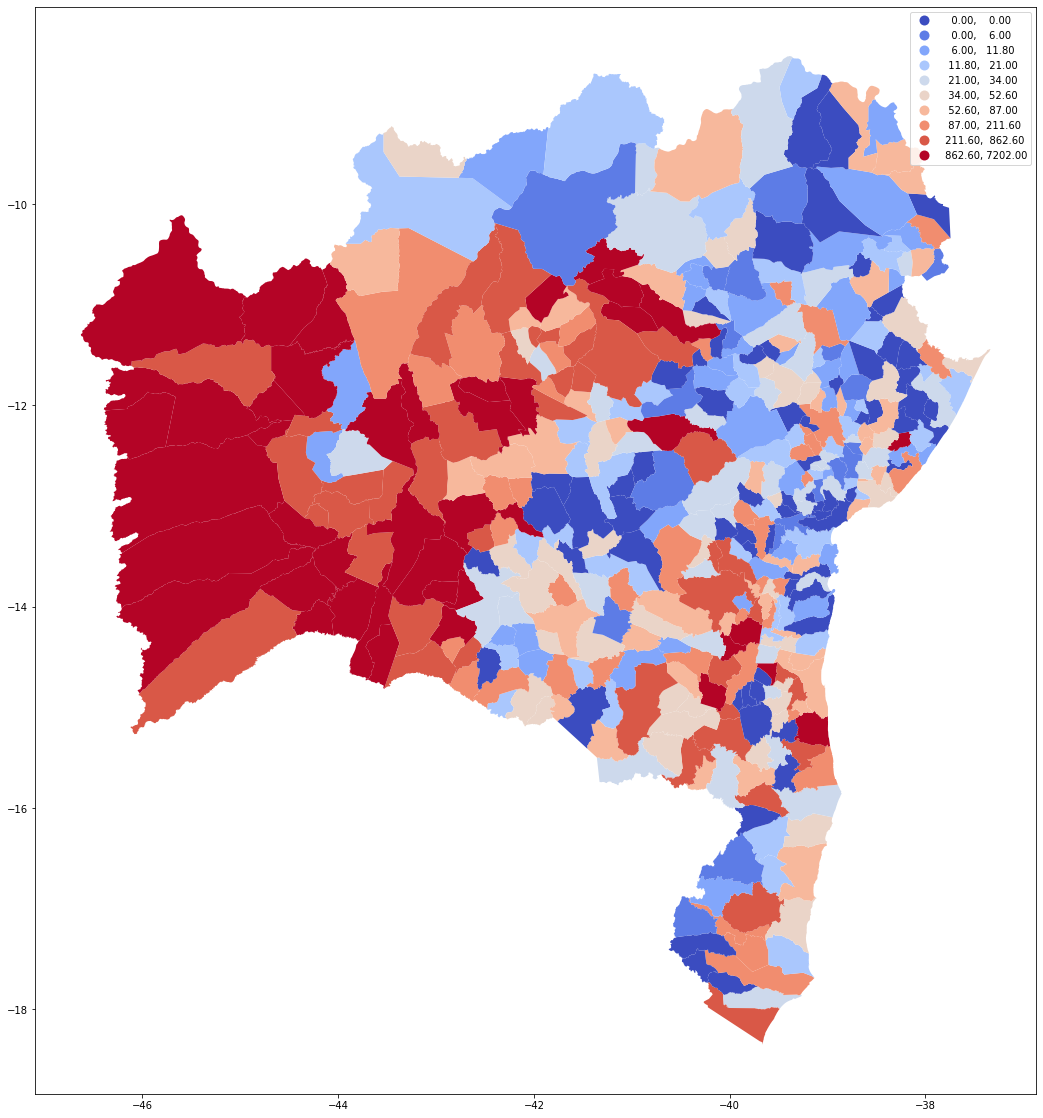

In [24]:
bahia.plot(column="Casos_100.000hab", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True)